In [4]:
'''from tika import parser
import os

source_directory = os.path.join(os.getcwd(), "text")

for filename in os.listdir(source_directory):
    file_data = parser.from_file("text/" +filename)
    file, extension = os.path.splitext(filename)
    output = file_data['content']
    if isinstance(output, str):
        output = output.encode('utf-8', errors='ignore')
        dest_file_path = file + '.txt'

        with open("fixed_texts"+"/" +dest_file_path, 'w') as the_file:
            the_file.write(str(output))
    else:
        continue'''

'from tika import parser\nimport os\n\nsource_directory = os.path.join(os.getcwd(), "text")\n\nfor filename in os.listdir(source_directory):\n    file_data = parser.from_file("text/" +filename)\n    file, extension = os.path.splitext(filename)\n    output = file_data[\'content\']\n    if isinstance(output, str):\n        output = output.encode(\'utf-8\', errors=\'ignore\')\n        dest_file_path = file + \'.txt\'\n\n        with open("fixed_texts"+"/" +dest_file_path, \'w\') as the_file:\n            the_file.write(str(output))\n    else:\n        continue'

# Drawing on our example from class and the discussion of PCA in Data-Sitters Club,

1. Import at least ten documents from files, using the OS module and any others relevant to process the text
2. Isolate a component (the example was nouns - try verbs or adjectives) using nltk and prepare appropriate sub-files for comparison on that axis
3. Load the documents and titles and run the contents through vectorize, using the provided boilerplate
4. Run a simple (2 word) vizualization comparing all texts
5. Run a full (PCA) vizualization comparing all texts using the provided PCA boilerplate. Note any interesting characteristics or outliers in a brief analysis
6. Bonus Challenge: This shows an example of collecting the texts from PDF files. Note it is also adjusted to handle shorter texts (rather than the novels from our previous example)

In [6]:
from pdfminer.high_level import extract_text
import os

textdir = '/Users/smargar/design/exercises/text/'
os.chdir(os.path.expanduser(textdir))

#textdir = '/Users/smargar/design/exercises/text'
# os.chdir(textdir)


In [7]:
# #NLTK is the NLP package we're using
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/smargar/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [22]:
'''#For each filename in the directory you listed...
for filename in os.listdir(os.path.expanduser(textdir)):
    #If the filename ends with .pdf...
    if filename.endswith('.txt'):
        text = extract_text(filename)
        #Create an output name that adds '-nouns' to the filename
        outname = filename.replace('.txt','-nouns.txt')
        #Open the output file
        with open(outname, 'w', errors="replace") as out:
            #Split the text into a list of sentences
            sentences = nltk.sent_tokenize(text)
            #For each sentence in the list of sentences...
            for sentence in sentences:
                    #For each word and each part-of-speech tag that you get
                    #When NLTK tokenizes the sentence (splitting words from punctuation, etc.)
                for word,pos in nltk.pos_tag(nltk.word_tokenize(str(sentence))):
                    #If the part-of-speech is noun
                    if (pos == 'NN' or pos == 'NNS'):
                        #Write the word (which should be a noun) to the output file
                        out.write(word)
                        #Write a space so the words don't smush together
                        out.write(' ')'''

'#For each filename in the directory you listed...\nfor filename in os.listdir(os.path.expanduser(textdir)):\n    #If the filename ends with .pdf...\n    if filename.endswith(\'.txt\'):\n        text = extract_text(filename)\n        #Create an output name that adds \'-nouns\' to the filename\n        outname = filename.replace(\'.txt\',\'-nouns.txt\')\n        #Open the output file\n        with open(outname, \'w\', errors="replace") as out:\n            #Split the text into a list of sentences\n            sentences = nltk.sent_tokenize(text)\n            #For each sentence in the list of sentences...\n            for sentence in sentences:\n                    #For each word and each part-of-speech tag that you get\n                    #When NLTK tokenizes the sentence (splitting words from punctuation, etc.)\n                for word,pos in nltk.pos_tag(nltk.word_tokenize(str(sentence))):\n                    #If the part-of-speech is noun\n                    if (pos == \'NN\' or 

In [10]:
#For each filename in the directory you listed...
for filename in os.listdir(os.path.expanduser(textdir)):
    #If the filename ends with .txt...
    if filename.endswith('.txt'):
        #Create an output name that adds '-verbs' to the filename
        outname = filename.replace('.txt','-verbs.txt')
        #Open the file
        with open(filename, 'r', encoding="utf-8") as f:
            #Open the output file
            with open(outname, 'w') as out:
                #Read the text from the file
                text = f.read()
                #Split the text into a list of sentences
                sentences = nltk.sent_tokenize(text)
                #For each sentence in the list of sentences...
                for sentence in sentences:
                    #For each word and each part-of-speech tag that you get
                    #When NLTK tokenizes the sentence (splitting words from punctuation, etc.)
                    for word,pos in nltk.pos_tag(nltk.word_tokenize(str(sentence))):
                        if (pos == 'VB' or pos == 'VBD' or pos == 'VBG' or pos == 'VBN' or pos == 'VBP' or pos == 'VBZ'):
                            #Write the word (which should be a noun) to the output file
                            out.write(word)
                            #Write a space so the words don't smush together
                            out.write(' ')

In [11]:
def load_directory(directory):
    documents, titles = [], []
    for filename in os.scandir(directory):
        #change this to analyze a different component after changing the save above
        if not filename.name.endswith('-verbs.txt'):
            continue

        with open(filename.path) as f:
            contents = f.read()
        lemmas = contents.lower().split()

        documents.append(' '.join(lemmas))
        title = filename.name.replace('-verbs.txt', '')
        titles.append(f"{title}")
    return documents, titles

In [12]:
documents, titles = load_directory(os.path.expanduser(textdir))
import sklearn.feature_extraction.text as text
print(titles[0:10])


['The Project Gutenberg eBook of The Divine Comedy', 'Provided by The Internet Classics Archive', 'Odyssey', 'The Rime of the Ancient Mariner', 'Full text of The Nibelungenlied', 'The Waste Land', 'beowulf-translation-by-seamus-heaney', 'Aenied, The - Virgil and A. S. Kline', 'paradiselost', 'paradiseregaind']


In [20]:
vectorizer = text.CountVectorizer(max_features=100, token_pattern = r"(?u)\b\w+\b")
v_documents = vectorizer.fit_transform(documents).toarray()

print(v_documents.shape)
print(vectorizer.get_feature_names()[:100])

(10, 100)
['am', 'answered', 'are', 'be', 'bear', 'been', 'began', 'being', 'bring', 'brought', 'called', 'came', 'come', 'did', 'do', 'done', 'drew', 'fell', 'find', 'found', 'gave', 'give', 'given', 'go', 'had', 'has', 'have', 'hear', 'heard', 'held', 'hold', 'is', 'keep', 'killed', 'knew', 'know', 'known', 'lay', 'leave', 'led', 'left', 'let', 'lost', 'made', 'make', 'n', 'passed', 'put', 'r', 'raised', 'rand', 'rbut', 'reached', 'replied', 'return', 'rfor', 'rin', 'rof', 'rose', 'round', 'rthe', 'rto', 'rwith', 'said', 'sat', 'saw', 'say', 'saying', 'says', 'see', 'seemed', 'seems', 'seen', 'sent', 'set', 'spake', 'speak', 'spoke', 'stand', 'stood', 'struck', 't', 'take', 'taken', 'tbk', 'tell', 'thee', 'think', 'thou', 'thought', 'told', 'took', 'turned', 'used', 'was', 'went', 'were', 'x8a', 'x93', 'xc3']


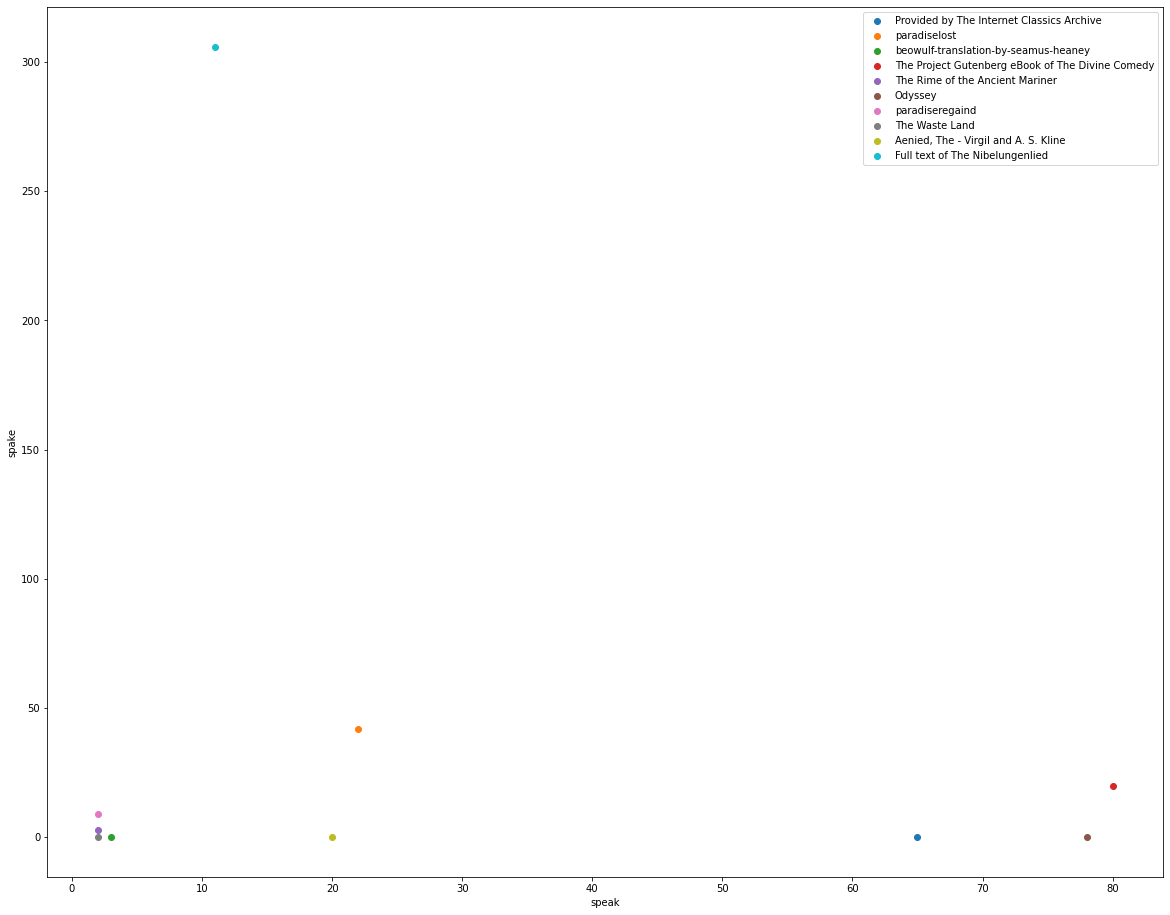

In [21]:
import matplotlib.pyplot as plt
import numpy as np

words = vectorizer.get_feature_names()
titles = np.array(titles)
x = v_documents[:, words.index('speak')]
y = v_documents[:, words.index('spake')]

fig, ax = plt.subplots(figsize=(20,16))
for title in set(titles):
    ax.scatter(x[titles==title], y[titles==title], label=title)
ax.set(xlabel='speak', ylabel='spake')
plt.legend();

In [23]:
import sklearn.decomposition

pca = sklearn.decomposition.PCA(n_components=2)
documents_proj = pca.fit_transform(v_documents)

print(v_documents.shape)
print(documents_proj.shape)

(10, 100)
(10, 2)


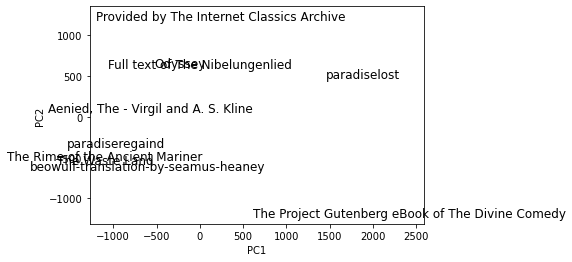

In [24]:
c1, c2 = documents_proj[:, 0], documents_proj[:, 1]

fig, ax = plt.subplots()
ax.scatter(c1, c2, facecolors='none')

for p1, p2, title in zip(c1, c2, titles):
    ax.text(p1, p2, title, fontsize=12,
            ha='center', va='center')

ax.set(xlabel='PC1', ylabel='PC2');